## SOCIAL NETWORK ADS

### Classification Model

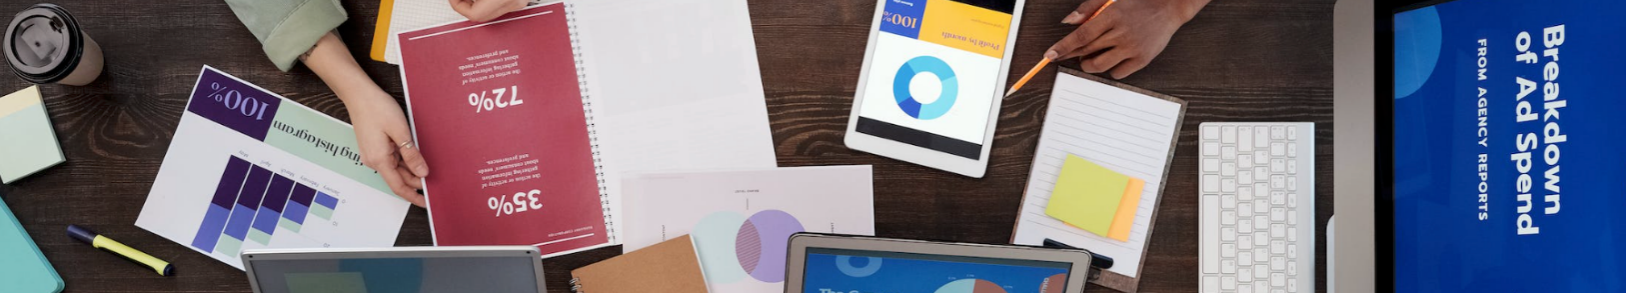

#### Hemant Thapa

##### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from time import time
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

##### LOADING DATASET

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


##### CHECKING NULL VALUES

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.size

2000

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##### CHECKING COLUMNS

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

##### CHECKING DATA TYPES

In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

##### CHECKING CUSTOMER DEMOGRAPHIC

##### 1. Maximum Age Frequency

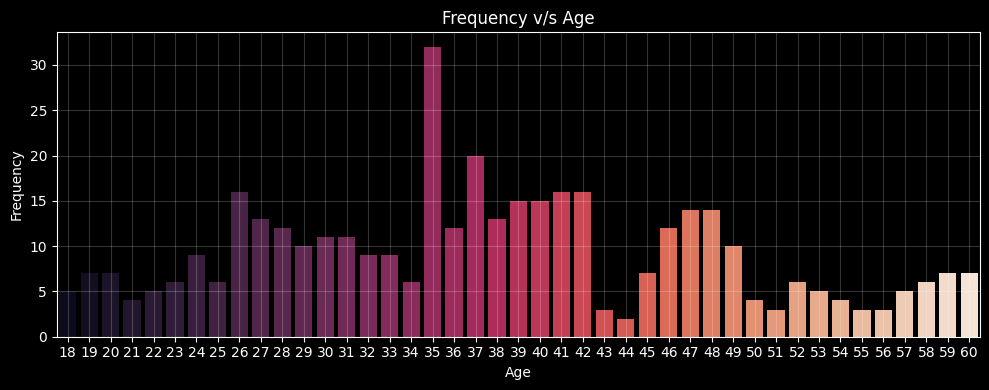

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(10,4))
sns.countplot(x="Age", data=df, palette='rocket', legend=False)
plt.title('Frequency v/s Age')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

We have Maximum age group 35, which are nearly above 30 customers and Minimum age group of 44 below 5 people on dataset

##### 2. Gender Comparision

In [11]:
male_count = []
female_count = []
for i in df.Gender:
    if i == "Male":
        i = +1
        male_count.append(i)
    else:
        i = +1
        female_count.append(i)

In [12]:
sum(male_count)

196

In [13]:
sum(female_count)

204

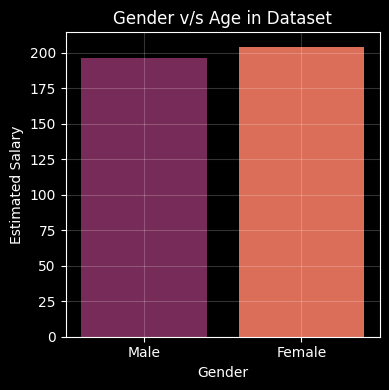

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(4,4))
sns.countplot(x="Gender", data=df, palette='rocket')
plt.title('Gender v/s Age in Dataset')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

Female Customer are slighlty higher compare to male customer. Female customer are above 204 and male customer are nearly 196.

##### 3. Age vs Estimated Salary with Purchased Color Encoded

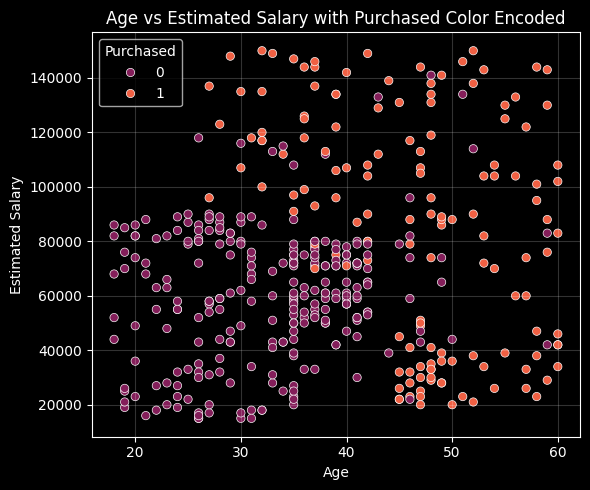

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette='rocket')
plt.title('Age vs Estimated Salary with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

This graph showcases the demographic of Age and Estimated Salary of customers in a certain dataset. The color encoding of the points indicates whether the customer has purchased a product or not.

##### 4. Gender & Purchased Color

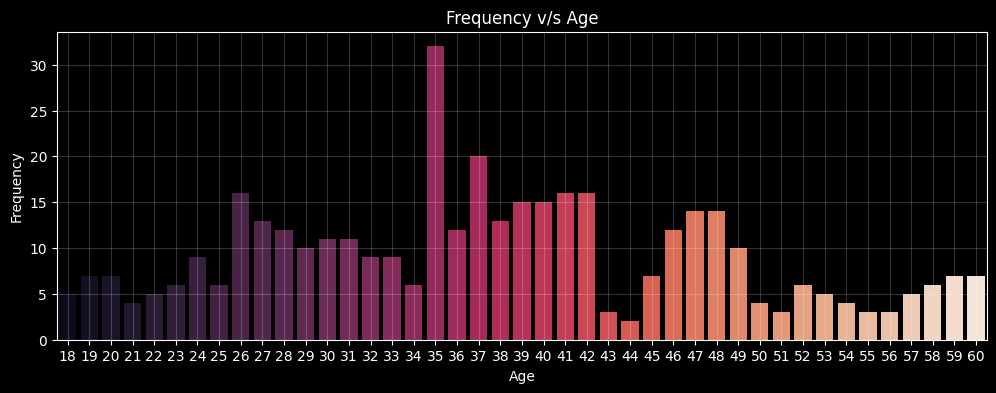

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 4))
sns.countplot(x="Age", data=df, palette='rocket', legend=False)
plt.title('Frequency v/s Age')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.show()

##### 5. Total Customer purchased and Non - Purchased frequency Chart

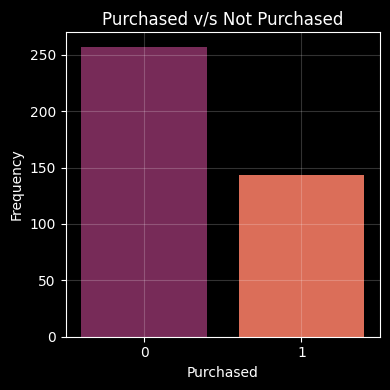

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(4,4))
sns.countplot(x="Purchased", data=df, palette='rocket')
plt.title('Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

##### 6. Male and Female Transactions

In [18]:
#separate the Male and Female columns
male_df = df[df.Gender == "Male"]
female_df = df[df.Gender == "Female"]

In [19]:
male_df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


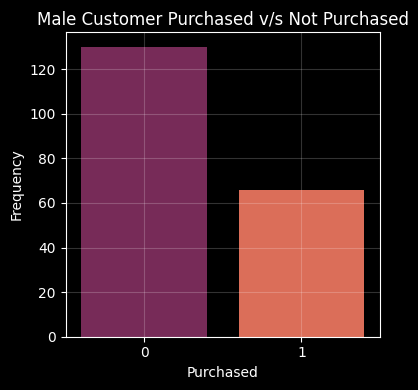

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=(4,4))
sns.countplot(x="Purchased", data=male_df, palette='rocket')
plt.title('Male Customer Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

In [21]:
female_df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


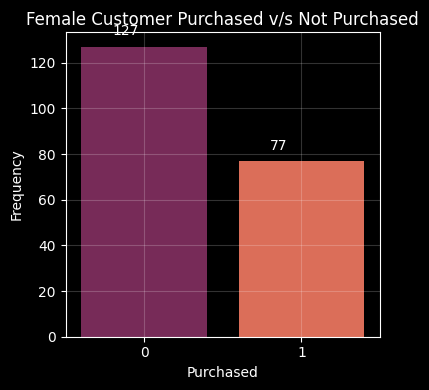

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(4,4))
sns.countplot(x="Purchased", data=female_df, palette='rocket')
for i in range(len(female_df['Purchased'].value_counts())):
    count = female_df['Purchased'].value_counts()[i]
    label = str(count)
    plt.annotate(label, (i-0.2, count+5), color='white')

plt.title('Female Customer Purchased v/s Not Purchased')
plt.ylabel('Frequency')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

##### FEATURE SELECTION

In [23]:
X = df[['Age', 'EstimatedSalary']].values.reshape(-2,2)
y = df['Purchased'].values

In [24]:
X = (X - X.mean())/X.std()

In [25]:
X[:5]

array([[-0.82316871, -0.37510211],
       [-0.82279102, -0.35149605],
       [-0.82300347,  0.19144331],
       [-0.82297986,  0.52192814],
       [-0.82316871,  0.97044326]])

In [26]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=0)

##### TEST DATASET

In [28]:
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80,)


##### TRAIN DATASET

In [29]:
print(X_train.shape)
print(y_train.shape)

(320, 2)
(320,)


##### TRAINING MODEL 

In [30]:
#train the logistic regression model
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#make predictions on the test set
y_pred = clf.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
#calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100}%')

Accuracy: 83.75%


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
#confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[52  6]
 [ 7 15]]


In [36]:
#classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.71      0.68      0.70        22

    accuracy                           0.84        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.84      0.84      0.84        80



##### Salary of the person is increasing according to their age.

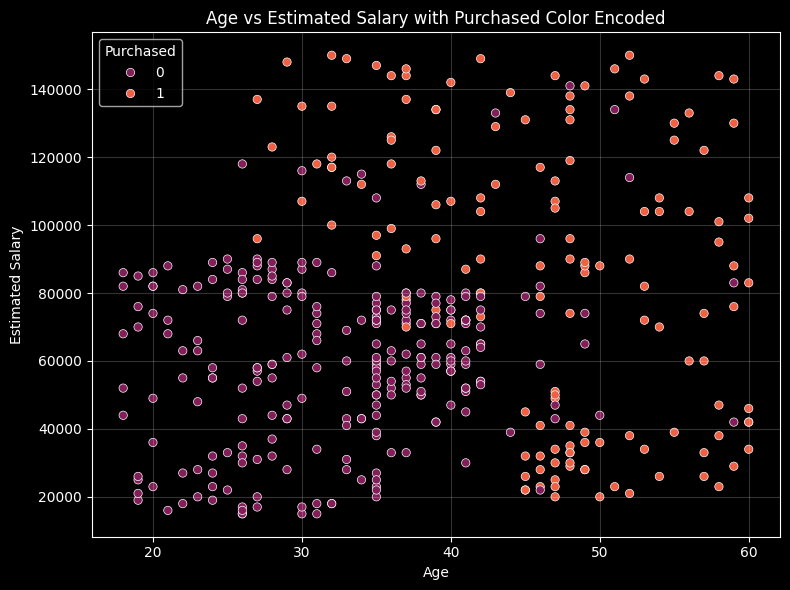

In [37]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette='rocket')
plt.title('Age vs Estimated Salary with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.gca().grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()